Sequential version of the infomax representation learning rule, two variants

In [ ]:
# definition of the distribution class
import numpy as np
import matplotlib.pyplot as plt
import itertools
import cProfile, pstats
import pickle
import os
from abc import ABC, abstractmethod

class distribution:
    def __init__(self, var_range, prob_densities=None):
        self.range = var_range
        self.eval_points = None
        self.prob_densities = None
        self.eval_num = None
        self.bin_width = None
        if not prob_densities is None:
            self.set_probs(prob_densities)

    def set_probs(self, prob_densities):
        assert 1.0 - np.abs(np.sum(prob_densities)) < 1e-7
        self.eval_points = np.linspace(self.range[0], self.range[1], len(list(prob_densities)))
        self.prob_densities = prob_densities
        self.eval_num = len(prob_densities)
        self.bin_width = (self.range[1] - self.range[0]) / self.eval_num

    def plot(self):
        plt.bar(self.eval_points, self.prob_densities, width=self.bin_width * 0.8)

5 0.2


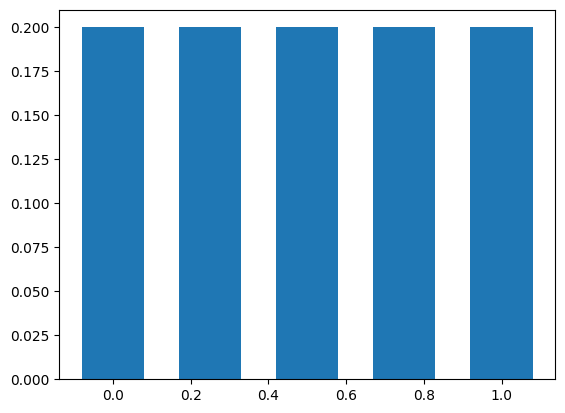

In [ ]:
d = distribution((0,1))
d.set_probs(np.ones(5) / 5)
d.plot()